In [1]:
import pandas as pd
df = pd.read_pickle('merged_exceptsub.pickle')

In [13]:
train, test = df[:350000], df[350000:]
X = train[['공휴일','주말제외공휴일','corona_stage','행정구역_확진자','전국_확진자','검색트랜드','평균하차수']]
y = train['하차']

In [28]:
X_test, y_test = test[['공휴일','주말제외공휴일','corona_stage','행정구역_확진자','전국_확진자','검색트랜드','평균하차수']], test['하차']

In [69]:
test[430:460]

,역명,date,시간,하차,승차,요일,공휴일,주말제외공휴일,corona_stage,구,행정구역_확진자,전국_확진자,검색트랜드,평균하차수
350430,제기동,2020-02-11,15-16,1360,1846,화요일,0,0,0,1,0,0.0,1.328130,1549.625
350431,제기동,2020-02-11,16-17,1203,1698,화요일,0,0,0,1,0,0.0,1.328130,1307.375
350432,제기동,2020-02-11,17-18,965,1609,화요일,0,0,0,1,0,0.0,1.328130,1006.000
350433,제기동,2020-02-11,18-19,1028,1837,화요일,0,0,0,1,0,0.0,1.328130,1100.375
350434,제기동,2020-02-11,19-20,774,839,화요일,0,0,0,1,0,0.0,1.328130,865.625
350435,제기동,2020-02-11,20-21,418,548,화요일,0,0,0,1,0,0.0,1.328130,486.875
350436,제기동,2020-02-11,21-22,373,424,화요일,0,0,0,1,0,0.0,1.328130,435.375
350437,제기동,2020-02-11,22-23,402,356,화요일,0,0,0,1,0,0.0,1.328130,400.375
350438,제기동,2020-02-11,23-24,198,149,화요일,0,0,0,1,0,0.0,1.328130,271.125
350439,제기동,2020-02-11,24-01,64,18,화요일,0,0,0,1,0,0.0,1.328130,95.500


In [15]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X= st.fit_transform(X)

In [29]:
X_test = st.transform(X_test)

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential()
model.add(layers.Dense(10, activation='relu',
                   input_shape=(X.shape[1],)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [41]:
model.fit(X, y, validation_data=(X_test,y_test), epochs=2, batch_size=000)

Epoch 1/2
10938/10938 [==============================] - 20s 2ms/step - loss: 77639.2969 - mae: 104.1464 - val_loss: 86071.7578 - val_mae: 124.5438
Epoch 2/2
10938/10938 [==============================] - 20s 2ms/step - loss: 76693.8438 - mae: 102.8075 - val_loss: 84467.7500 - val_mae: 121.6509


In [30]:
val_mse, val_mae = model.evaluate(X_test, y_test)

2125/2125 [==============================] - 2s 1ms/step - loss: 73633.2578 - mae: 105.0515


In [42]:
yhat = model.predict(X_test)

In [43]:
yhat

array([[ 44.255592],
       [411.15698 ],
       [907.42773 ],
       ...,
       [ 72.93061 ],
       [ 49.64073 ],
       [ 19.350824]], dtype=float32)

In [63]:
yy = y_test.reset_index()['하차'].tolist()

<function matplotlib.pyplot.show(*args, **kw)>

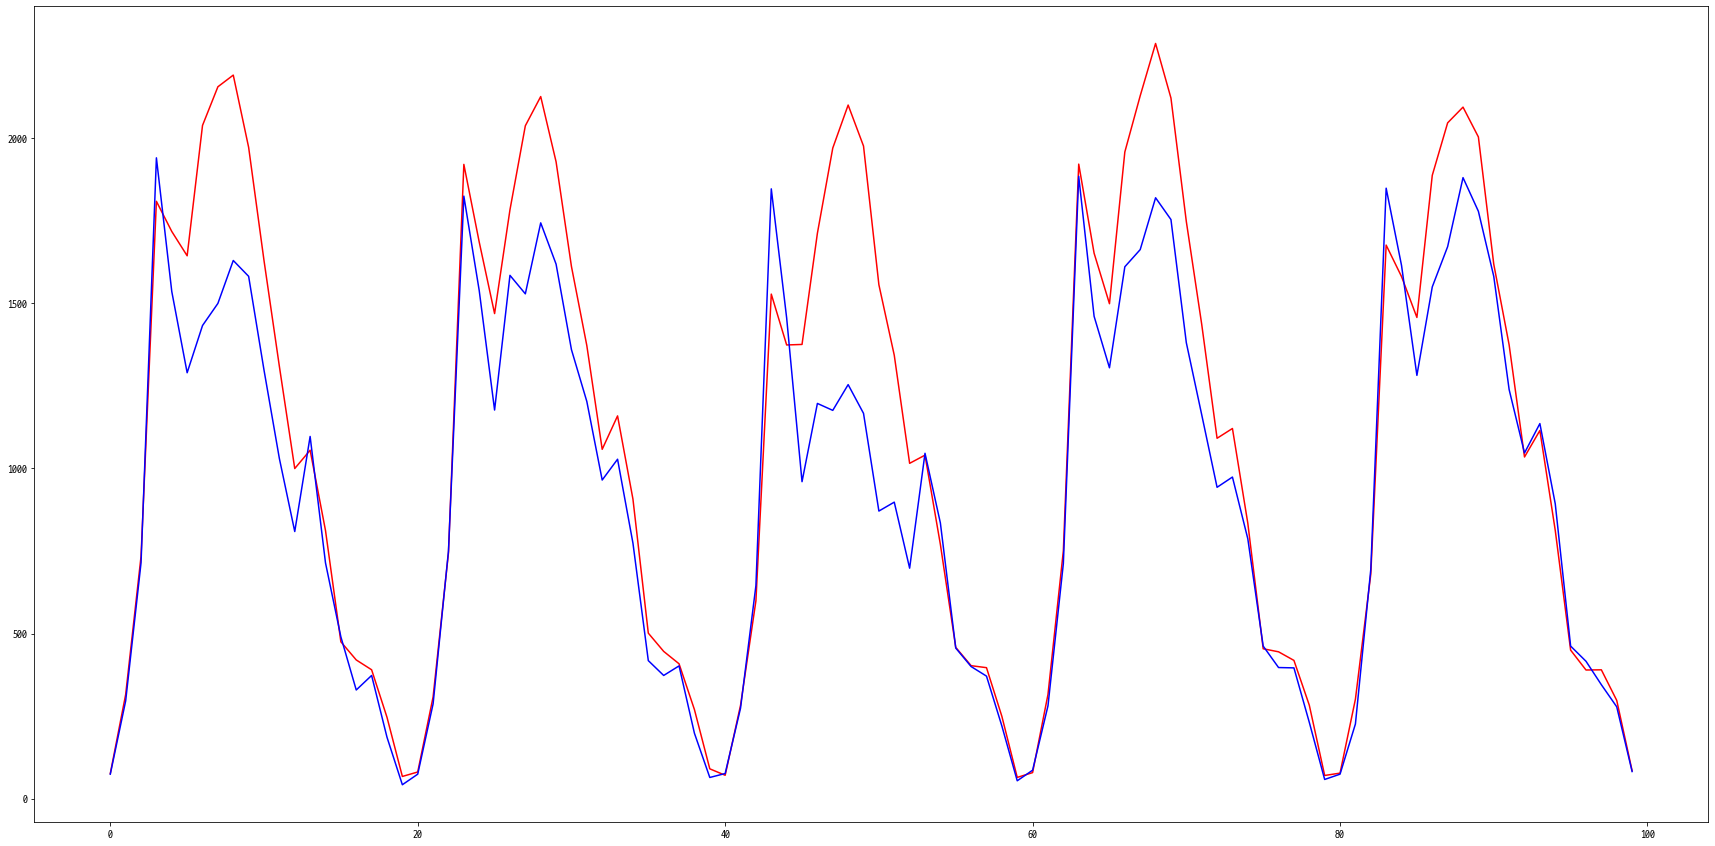

In [65]:
plt.figure(figsize=(30, 15))
plt.plot(yhat[400:500], c='r')
plt.plot(yy[400:500], c='b')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

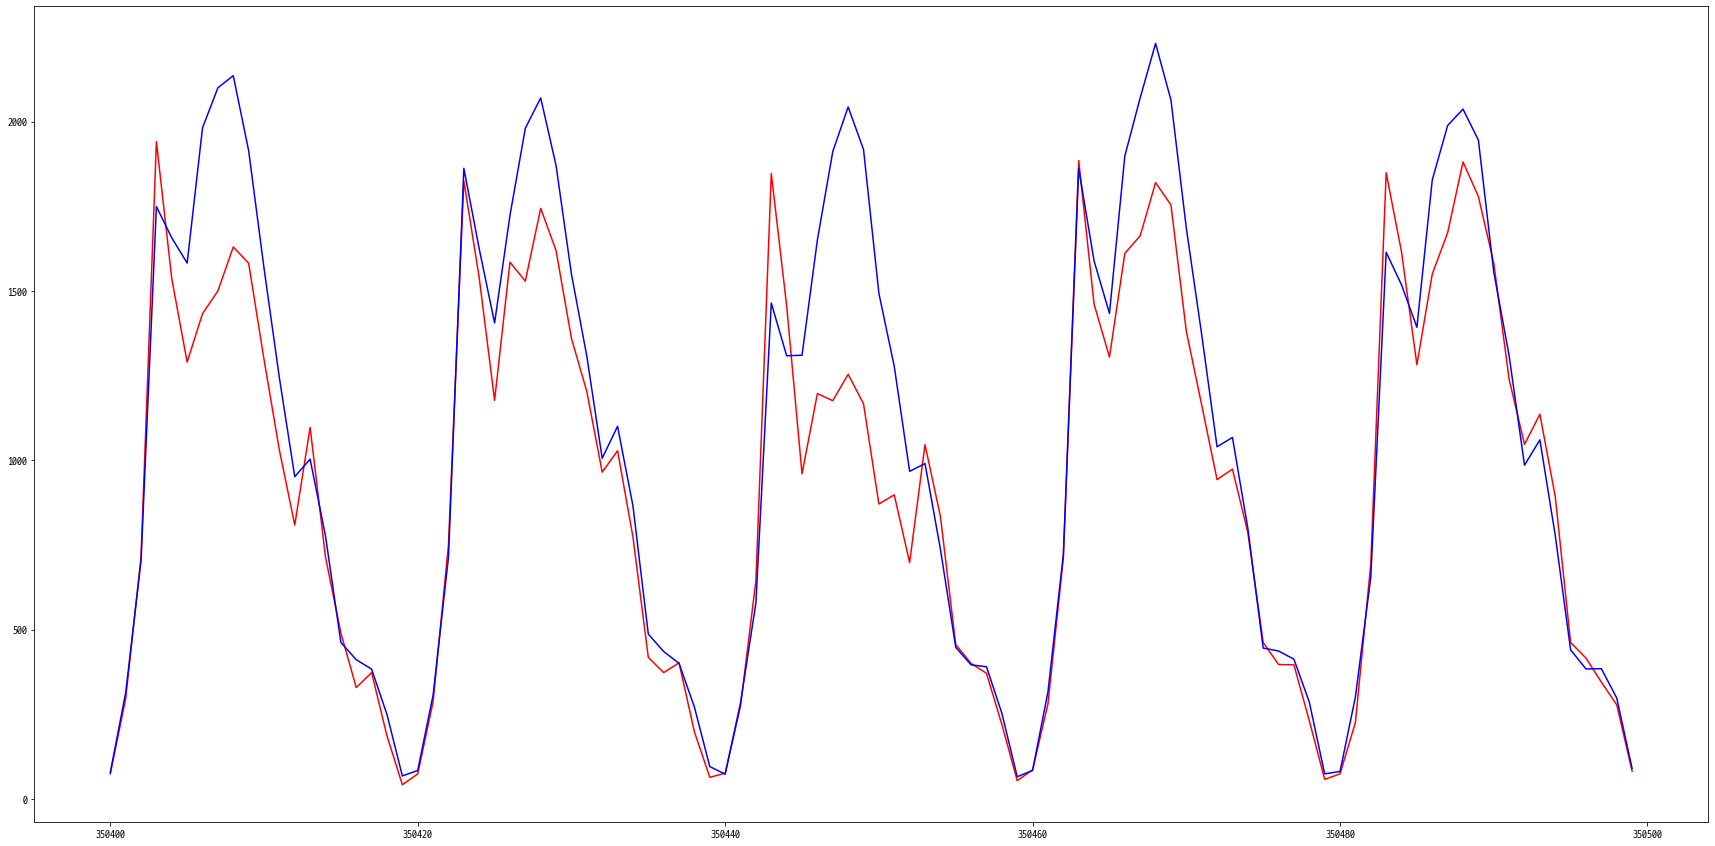

In [70]:
plt.figure(figsize=(30, 15))
plt.plot(test['하차'][400:500], c='r')
plt.plot(test['평균하차수'][400:500], c='b')
plt.show

AttributeError: 'Line2D' object has no property 'figsize'

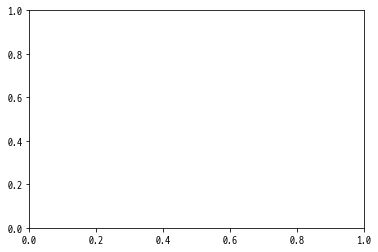

In [27]:
import matplotlib.pyplot as plt
plt.plot(model.predict(X))